In [1]:
import pandas as pd
import numpy as np

DATA DESCRIPTION
```
file name -> Columns
quater-i.csv -> ['order_id', 'quantity', 'item_id', 'choice_description_id' 'item_price']
items.csv -> ['item_id', 'item_name']
```
Dataset Link - https://drive.google.com/drive/folders/1Z0kaFybvgFeczeUj4dldUnhTdloLqLsL?usp=share_link

In [4]:
# import like this
items_path = "./datasets/items.csv"
q1_path = "./datasets/quarter-1.csv"
q2_path = "./datasets/quarter-2.csv"
q3_path = "./datasets/quarter-3.csv"


q1= pd.read_csv(q1_path)
q2 = pd.read_csv(q2_path)
q3 = pd.read_csv(q3_path)

items = pd.read_csv(items_path)

###`Q:1-5`
1. You are given three quater files, your job is to append these three files and make a single dataframe.
2. Have a index as Q-1 Q-2 Q-3 for respective quater files in the dataframe
3. Your are given a file items.csv which has item_id and item_name. Find out most sold items in each quarter.
4. Find out items which has made most revenue in each quarter.
5. Find out avg order price of each quarter.

***Note: item_price is given as str with $ sign, in earlier task you have converted this to rupees, here too first convert item_price field in rupees.***

In [16]:
#q1
pd.concat([q1,q2,q3])

,order_id,quantity,item_id,choice_description_id,item_price
0,1,1,1,1,$3.39
1,1,1,2,2,$3.39
2,2,2,4,3,$16.98
3,4,1,7,6,$9.25
4,6,1,9,8,$8.75
...,...,...,...,...,...
2342,1829,1,23,92,$11.25
2343,1830,1,23,1043,$11.25
2344,1832,1,10,116,$8.75
2345,1832,1,8,0,$4.45


In [17]:
#q2
pd.concat([q1,q2,q3],keys=['Q-1','Q-2','Q-3'])

order_id quantity item_id choice_description_id item_price
Q-1 0           1        1       1                     1     $3.39 
    1           1        1       2                     2     $3.39 
    2           2        2       4                     3    $16.98 
    3           4        1       7                     6     $9.25 
    4           6        1       9                     8     $8.75 
...           ...      ...     ...                   ...        ...
Q-2 2342     1829        1      23                    92    $11.25 
    2343     1830        1      23                  1043    $11.25 
    2344     1832        1      10                   116     $8.75 
    2345     1832        1       8                     0     $4.45 
    2346     1834        1      20                   515    $11.25 

[4622 rows x 5 columns]

In [74]:
# q3
temp=pd.concat([q1,q2,q3],keys=['Q-1','Q-2','Q-3'])
temp['item_price']=(temp['item_price'].str.strip('$').values.astype(float))*120


`Q-3`

In [85]:
t1=q1.merge(items,on='item_id')
t1[( t1['item_id']==t1['item_id'].value_counts().sort_values().tail(1).index[0])][['item_id','item_price','item_name']].head(1)

,item_id,item_price,item_name
26,4,$16.98,Chicken Bowl


In [86]:
t2=q2.merge(items,on='item_id')
t2[( t2['item_id']==t2['item_id'].value_counts().sort_values().tail(1).index[0])][['item_id','item_price','item_name']].head(1)

,item_id,item_price,item_name
70,4,$10.98,Chicken Bowl


`Q-4`

In [149]:
t1=q1.copy()
t1['item_price']=(t1['item_price'].str.strip('$').values.astype(float))*120
t1.groupby('item_id').sum().sort_values('item_price').tail(1).merge(items,on='item_id')

,item_id,order_id,quantity,choice_description_id,item_price,item_name
0,4,336073,367,130352,423086.4,Chicken Bowl


In [150]:
t2=q2.copy()
t2['item_price']=(t2['item_price'].str.strip('$').values.astype(float))*120
t2.groupby('item_id').sum().sort_values('item_price').tail(1).merge(items,on='item_id')

,item_id,order_id,quantity,choice_description_id,item_price,item_name
0,4,377853,394,139450,458041.2,Chicken Bowl


`Q-5`

In [160]:
t=pd.concat([q1,q2,q3],keys=['Q-1','Q-2','Q-3'])
t['item_price']=(t['item_price'].str.strip('$').values.astype(float))*120
t.reset_index().drop(columns=['level_1']).groupby('level_0')['item_price'].mean()

level_0
Q-1    909.256615
Q-2    882.599233
Name: item_price, dtype: float64

In [ ]:
# code here

###`Q-6` From the IPL wala dataset you have to find the Purple cap holder each season.

*Note: Bowler with most no wickets in a season gets purple cap. If more than one bowler have same no of wickets in the season, one with least ecomnomy among them is purple cap holder.*

Bowler's Economy = runs-conceded per six balls

In [173]:
# code here
ball=pd.read_csv('./datasets/ipl_deliveries.csv')
match=pd.read_csv('./datasets/ipl-matches.csv')

In [174]:
ball.head(1)

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [175]:
match.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon


In [178]:
ipl=match.merge(ball,on='ID')
group=ipl.groupby('Season')
ipl.head(1)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [188]:
ans=pd.DataFrame([],columns=['Season','Bowler','Wickets'])
for seas,data in group:
    t=data[~data['player_out'].isnull()]['bowler'].value_counts().sort_values(ascending=False).head(1)
    ans.loc[ans.shape[0]]=[seas,t.index[0],t[0]]
ans

,Season,Bowler,Wickets
0,2007/08,Sohail Tanvir,24
1,2009,RP Singh,26
2,2009/10,PP Ojha,22
3,2011,SL Malinga,30
4,2012,M Morkel,30
5,2013,DJ Bravo,34
6,2014,MM Sharma,26
7,2015,DJ Bravo,28
8,2016,B Kumar,24
9,2017,B Kumar,28


###`Q-7:` Best bowler in death overs.
*Note: Have taken most no of wickets in case of tie with least economy*

Death Overs - [16-20]

In [190]:
pd.options.display.max_columns=None

In [203]:
# code here
# ipl[((~ipl['player_out'].isnull())&(ipl['overs']>15))]['bowler'].value_counts().head(1)
ans=pd.DataFrame([],columns=['Season','Bowler','Wickets'])
for seas,data in group:
    t=data[((~data['player_out'].isnull())&(data['overs']>15))]['bowler'].value_counts().sort_values(ascending=False).head(1)
    ans.loc[ans.shape[0]]=[seas,t.index[0],t[0]]
ans

,Season,Bowler,Wickets
0,2007/08,Sohail Tanvir,18
1,2009,RP Singh,15
2,2009/10,IK Pathan,10
3,2011,DE Bollinger,13
4,2012,SP Narine,21
5,2013,DJ Bravo,21
6,2014,MM Sharma,15
7,2015,DJ Bravo,22
8,2016,SR Watson,13
9,2017,JD Unadkat,18


###`Q-8` Batsman record season wise

Make a function which takes a input `batsman_name` and it returns a dataframe.
Columns of the data frame are - `['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate']`.
* In result make `Season` column as index.

* Avg - total_runs/ no of time got out. - player_out column will help.
* StrikeRate -(total_runs/ balls faced) * 100- wides are not included in batsman ball faced counts. No balls are included. -> Extra_type column will help
* Batsman Can score runs on No Balls.
* Batsman can get out on No Ball or Wides. And even while being on non-striker. Keep these things in mind before masking.

In [208]:
ball.head(1)

,ID,Team,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Rajasthan RoyalsGujarat Titans,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans


In [238]:
# code here
def fun(name):
    ans=pd.DataFrame([],columns=['Season','Innings', 'TotalRuns', 'Avg', 'HighestScore','StrikeRate'])
    t=ipl[ipl['batter']==name]
    for group,data in t.groupby('Season'):
        innings=len(data['ID'].unique())
        runs=data['total_run'].sum()
        avg=runs/data[(~data['player_out'].isnull())].shape[0]
        top=data.groupby('ID').apply(lambda x: x['total_run'].sum()).max()
        sr=(runs/data[(data['extra_type'].isnull())].shape[0])*100
        ans.loc[ans.shape[0]]=[group,innings,runs,avg,top,sr]
    return ans
fun('V Kohli')

,Season,Innings,TotalRuns,Avg,HighestScore,StrikeRate
0,2007/08,12,187,15.583333,40,122.222222
1,2009,13,258,23.454545,53,119.444444
2,2009/10,13,320,24.615385,64,152.380952
3,2011,16,584,44.923077,74,129.490022
4,2012,15,375,31.250000,76,116.099071
5,2013,16,660,47.142857,101,146.666667
6,2014,14,373,26.642857,77,128.620690
7,2015,16,519,37.071429,83,134.455959
8,2016,16,998,83.166667,116,157.413249
9,2017,10,314,28.545455,65,125.099602


###`Q-9` Using both dataset, make a dataframe as described below

Data Frame columns-> `['PlayerOfThematch', 'BattingFigure', 'BowlingFigure']`

* BattingFigure->`<runs>/<balls>`
* BowlingFigure->`<wicket>/<runs-conceded>`

DataFrame should have one record for each match.

Say 'V Kohli' got POM award then in dataset include his batting figure of that match. Say he scored 112runs in 76 balls. And he hasn't bowled so Bowling Figure will be NaN
```
PlayerOfThematch BattingFigure BowlingFigure
V Kohli          112/76         nan  

```


In [262]:
# code here
ans=pd.DataFrame([],columns=['Match','Player of the match','Batting figure','Bowling figure'])
group=match.merge(ball,on='ID').groupby('ID')
for gro,data in group:
    name=data['Player_of_Match'].head(1).values[0]
    if data['batter'].isin([name]).sum()>0:
        bat=( data[data['batter']==name]['total_run'].sum() )/( data[data['batter']==name].shape[0] )
    else:
        bat=np.nan
    if data['bowler'].isin([name]).sum()>0:
        bowl=(data[((data['bowler']==name) & (~data['player_out'].isnull()))].shape[0])/(data[( data['bowler']==name )]['total_run'].sum())
    else:
        bowl=np.nan
    ans.loc[ans.shape[0]]=[gro,name,bat,bowl]
ans.set_index('Match')

,Player of the match,Batting figure,Bowling figure
Match,,,
335982.0,BB McCullum,2.194805,NaN
335983.0,MEK Hussey,2.166667,NaN
335984.0,MF Maharoof,NaN,0.142857
335985.0,MV Boucher,2.000000,NaN
335986.0,DJ Hussey,1.000000,0.028571
...,...,...,...
1304116.0,Harpreet Brar,NaN,0.115385
1312197.0,DA Miller,1.842105,NaN
1312198.0,RM Patidar,2.072727,NaN


## **Questions Based on Iris Dataset**

- **Sepal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **SepalLengthCm:** Sepal length of flowers in cm
    - **SepalWidthCm:** Sepal width of flowers in cm

- **Petal All:** https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating this sub-dataset.
    - **Id:** Id of the records.
    - **PetalLengthCm:** Petal length of flowers in cm
    - **PetalWidthCm:** Petal width of flowers in cm

- **Iris Virginica:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Versicolor:** https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv
    - **Unnamed: 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

- **Iris Setosa:** https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv
    - **Unnamed 0:** Unused column. This column is created when creating the sub-dataset.
    - **Id:** Id of the records.
    - **Species:** Name of this species.

In [263]:
import pandas as pd
sepal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT58ekmHTwptX7Bs4QOy6YByA1HMvYTACeeIjrKhHE0Pg1K_3egewHMKMh02zN9D5-yHVXfvuaa3s5u/pub?gid=2028782809&single=true&output=csv")
petal_all = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQinLXShrOz4ExNaW1bSQVuvbbhIzJW7G0kkkD2SvqSD6STjLrQQiftgI7BGe10sBZi0CNr2_sJpQAz/pub?gid=1580010789&single=true&output=csv")

virginica = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSK39MwduGPHYNgw5yViezoLYCVDKMCWIHzjnt3GZNaxHPFOQLr2q6no_tyqTsOk-VfXleslfGVe9eJ/pub?gid=314231613&single=true&output=csv")
versicolor = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vTcSFgLnabqIrgIc5WlwvnbbvyyJsgZjR-0E0-4TR-5aHgv_0EP6yNWglkkls3AXM2qHCR5VYzWCoTM/pub?gid=715607857&single=true&output=csv")
setosa = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSjqJpdgy2X_oDUUqQ0sSaFKqnnf8MYU4KgJSYgHaHmq0Wb1weMOsJXh-rICHmkLcaTkOwzMYLeh959/pub?gid=2003684803&single=true&output=csv")


### `Q-9:` Plot a bar chart of the average Sepal Length  of Virginica and average Petal length of Setosa flower.

<Axes: >

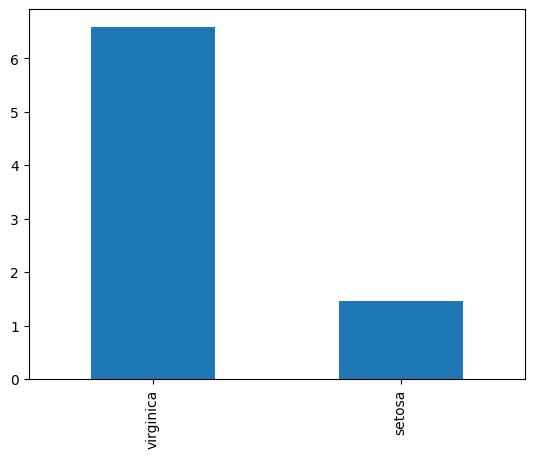

In [280]:
# code here
a1=virginica.merge(sepal_all,on='Id')
a2=setosa.merge(petal_all,on='Id')
pd.Series({'virginica':a1['SepalLengthCm'].mean(),'setosa':a2['PetalLengthCm'].mean()}).plot(kind='bar')

### `Q-10:` Create the complete dataset by uisng the below datasets:
- virginica
- versicolor
- setosa
- sepal all
- petal all

This dataset should have these below column names in order:
1. Id
2. Species
3. SepalLengthCm
4. SepalWidthCm
5. PetalLengthCm
6. PetalWidthCm

Also, the dataset should be shuffled means the `Id` column should not be in increasing or decreasing order. So, make a dataset which has the shuffled Id column. You can use `DataFrame.sample()` method to shuffle.

In [302]:
# code here
a1=sepal_all.merge(petal_all,on='Id').merge(setosa,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
a2=sepal_all.merge(petal_all,on='Id').merge(virginica,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
flow=pd.concat([a1,a2],ignore_index=True)
flow=flow[['Id','Species','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
flow

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
95,146,Iris-virginica,6.7,3.0,5.2,2.3
96,147,Iris-virginica,6.3,2.5,5.0,1.9
97,148,Iris-virginica,6.5,3.0,5.2,2.0
98,149,Iris-virginica,6.2,3.4,5.4,2.3


### `Q-11:` Find out the maximum and minimum sepal width and petal width of Setosa and Versicolor. To do this:
- First create a dataset with merging the required datasets
- After that, use `groupby` to create groups based on the "Species" column.
- Then find out which are asked in this question.


The output should be like this:
```bash
Minimum Sepal width of Setosa is 2.3
Maximum Sepal width of Setosa is 4.4

**************************************************

Minimum Sepal width of Versicolor is 2.0
Maximum Sepal width of Versicolor is 3.4

**************************************************
```

In [304]:
# code here
a1=sepal_all.merge(petal_all,on='Id').merge(setosa,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
a2=sepal_all.merge(petal_all,on='Id').merge(versicolor,on='Id').drop(columns=['Unnamed: 0_x','Unnamed: 0_y','Unnamed: 0'])
flow=pd.concat([a1,a2],ignore_index=True)
flow=flow[['Id','Species','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
flow

,Id,Species,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,Iris-setosa,5.1,3.5,1.4,0.2
1,2,Iris-setosa,4.9,3.0,1.4,0.2
2,3,Iris-setosa,4.7,3.2,1.3,0.2
3,4,Iris-setosa,4.6,3.1,1.5,0.2
4,5,Iris-setosa,5.0,3.6,1.4,0.2
...,...,...,...,...,...,...
95,96,Iris-versicolor,5.7,3.0,4.2,1.2
96,97,Iris-versicolor,5.7,2.9,4.2,1.3
97,98,Iris-versicolor,6.2,2.9,4.3,1.3
98,99,Iris-versicolor,5.1,2.5,3.0,1.1


In [306]:
# code here
for gr,data in flow.groupby('Species'):
    print(f"Minimum Sepal width of {gr} is {data['SepalWidthCm'].min()}")
    print(f"Maximum Sepal width of {gr} is {data['SepalWidthCm'].max()}")


Minimum Sepal width of Iris-setosa is 2.3
Maximum Sepal width of Iris-setosa is 4.4
Minimum Sepal width of Iris-versicolor is 2.0
Maximum Sepal width of Iris-versicolor is 3.4
